<a href="https://colab.research.google.com/github/yms0606/SecuLayer/blob/main/March%20Machine%20Learning%20Mania%202016/March_Machine_Learning_Mania_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout, Flatten, Embedding
from keras.layers import add, dot # add = merge
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.models import Model

In [ ]:
dr = pd.read_csv('/content/drive/MyDrive/ML study/march-machine-learning-mania-2016-v2/RegularSeasonDetailedResults.csv')

In [ ]:
dr.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [ ]:
simple_df_1 = pd.DataFrame()
simple_df_1[['team1','team2']] = dr[['Wteam','Lteam']].copy()
simple_df_1['pred'] = 1

simple_df_2 = pd.DataFrame()
simple_df_2[['team1','team2']] = dr[['Lteam','Wteam']].copy()
simple_df_2['pred'] = 0

simple_df = pd.concat((simple_df_1, simple_df_2), axis = 0)
simple_df.head()


,team1,team2,pred
0,1104,1328,1
1,1272,1393,1
2,1266,1437,1
3,1296,1457,1
4,1400,1208,1


In [ ]:
n = simple_df.team1.nunique()
n

355

In [ ]:
trans_dict = {t: i for i, t in enumerate(simple_df.team1.unique())} # team num : index
simple_df['team1'] = simple_df['team1'].apply(lambda x: trans_dict[x])
simple_df['team2'] = simple_df['team2'].apply(lambda x: trans_dict[x])
simple_df.head()

,team1,team2,pred
0,0,67,1
1,1,164,1
2,2,93,1
3,3,221,1
4,4,110,1


In [ ]:
train = simple_df.values
np.random.shuffle(train)

In [ ]:
def embedding_input(name, n_in, n_out, reg):
  inp = Input(shape=(1,), dtype="int64", name=name)
  return inp, Embedding(n_in, n_out, input_length=1, activity_regularizer=l2(reg))(inp)
def create_bias(inp, n_in):
  x = Embedding(n_in, 1, input_length=1)(inp)
  return Flatten()(x)

In [ ]:
n_factors = 50
team1_in, t1 = embedding_input("team1_in", n, n_factors, 1e-4)    # 50 dim embedding
team2_in, t2 = embedding_input("team2_in", n, n_factors, 1e-4)
b1 = create_bias(team1_in, n)
b2 = create_bias(team2_in, n)

In [ ]:
x = dot([t1, t2], axes=1)
x = Flatten()(x)
x = add([x, b1])
x = add([x, b2])
x = Dense(1, activation ='sigmoid')(x)
model = Model([team1_in, team2_in], x)
model.compile(Adam(0.001), loss='binary_crossentropy')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 team1_in (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 team2_in (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        17750       ['team1_in[0][0]']               
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 50)        17750       ['team2_in[0][0]']               
                                                                                              

In [ ]:
history = model.fit([train[:,0], train[:,1]], train[:,2],
                    batch_size=64, epochs=10, verbose=2)

Epoch 1/10
2227/2227 - 8s - loss: 0.6201 - 8s/epoch - 4ms/step
Epoch 2/10
2227/2227 - 8s - loss: 0.5928 - 8s/epoch - 3ms/step
Epoch 3/10
2227/2227 - 6s - loss: 0.5866 - 6s/epoch - 3ms/step
Epoch 4/10
2227/2227 - 8s - loss: 0.5802 - 8s/epoch - 4ms/step
Epoch 5/10
2227/2227 - 6s - loss: 0.5767 - 6s/epoch - 3ms/step
Epoch 6/10
2227/2227 - 8s - loss: 0.5725 - 8s/epoch - 3ms/step
Epoch 7/10
2227/2227 - 6s - loss: 0.5707 - 6s/epoch - 3ms/step
Epoch 8/10
2227/2227 - 9s - loss: 0.5686 - 9s/epoch - 4ms/step
Epoch 9/10
2227/2227 - 6s - loss: 0.5664 - 6s/epoch - 3ms/step
Epoch 10/10
2227/2227 - 8s - loss: 0.5642 - 8s/epoch - 4ms/step


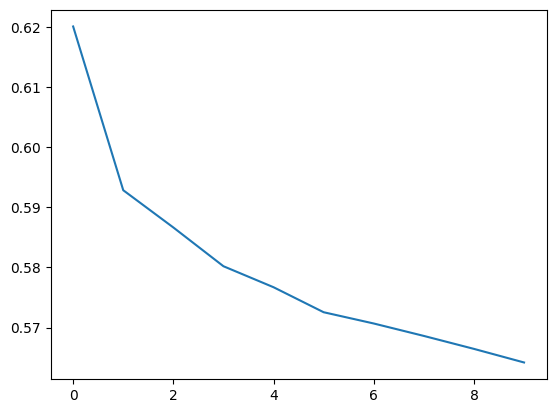

In [ ]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/ML study/march-machine-learning-mania-2016-v2/SampleSubmission.csv')
sub['team1'] = sub['Id'].apply(lambda x: trans_dict[int(x.split("_")[1])])
sub['team2'] = sub['Id'].apply(lambda x: trans_dict[int(x.split("_")[2])])
sub.head()

,Id,Pred,team1,team2
0,2016_1112_1114,0.5,97,143
1,2016_1112_1122,0.5,97,29
2,2016_1112_1124,0.5,97,98
3,2016_1112_1138,0.5,97,144
4,2016_1112_1139,0.5,97,32


In [ ]:
sub['Pred'] = model.predict([sub.team1, sub.team2])
sub = sub[['Id','Pred']]
sub.head()

72/72 [==============================] - 0s 3ms/step


,Id,Pred
0,2016_1112_1114,0.864770
1,2016_1112_1122,0.918691
2,2016_1112_1124,0.593583
3,2016_1112_1138,0.841010
4,2016_1112_1139,0.635128


In [ ]:
sub.to_csv('CF.csv', index=False)